<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_9(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치를 이용한 머신 러닝

간단한 분류 알고리즘 훈련
  - 인공뉴런
  - 퍼셉트론
  - 적응형 선형 뉴런, 학습
   

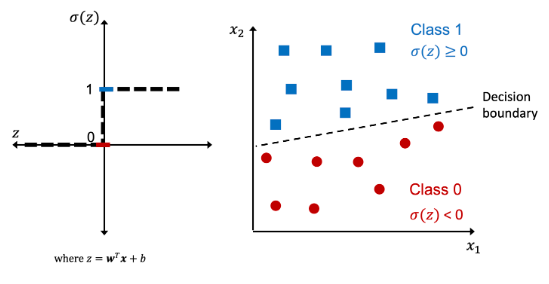

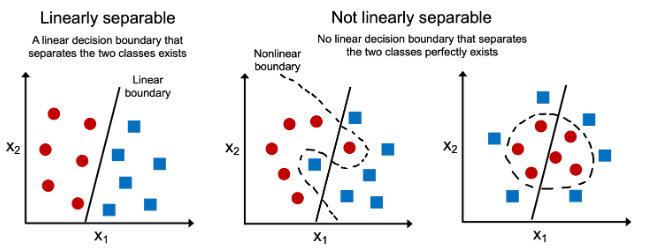

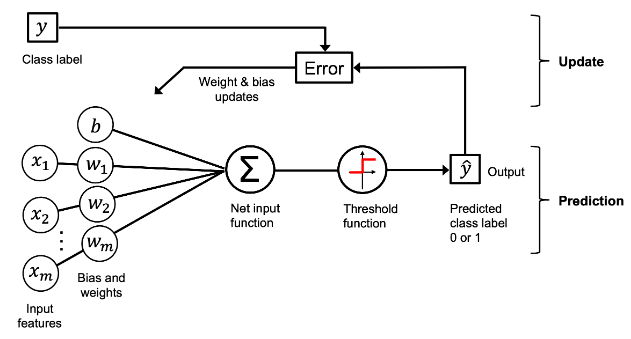

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        # 학습률(eta)와 반복횟수(epochs), 랜덤 시드(random_state)를 초기화합니다.
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        # 가중치와 절편을 초기화합니다.
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        # 에포크마다 학습을 수행합니다.
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # 예측과 실제 값의 차이를 이용해 업데이트 양을 결정합니다.
                update = self.eta * (target - self.predict(xi))
                # 가중치와 절편을 업데이트합니다.
                self.w_ += update * xi
                self.b_ += update
                # 오류가 발생하면 errors를 증가시킵니다.
                errors += int(update != 0.0)
            # 각 에포크마다 오류 수를 저장합니다.
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # 순 입력 계산: 가중치와 특성의 내적합 + 절편
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        # 예측 함수: 순 입력이 0 이상이면 1, 그렇지 않으면 0
        return np.where(self.net_input(X) >= 0.0, 1, 0)


####퍼셉트론(Perceptron)은 인공 신경망의 가장 기본적인 형태로, 1957년 프랑크 로젠블랫(Frank Rosenblatt)에 의해 제안된 이진 분류기입니다. 퍼셉트론은 주어진 입력을 바탕으로 이진 분류(두 가지 클래스 중 하나로 분류)를 수행하며, 가장 간단한 형태의 신경망 구조라고 할 수 있습니다. 퍼셉트론의 기본 개념과 동작 원리를 자세히 설명하겠습니다.

1. 퍼셉트론의 구조
퍼셉트론은 단일 뉴런(노드)으로 구성되어 있으며, 다음과 같은 요소로 이루어져 있습니다:

입력값: 입력 벡터
𝑋
=
[
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
]
X=[x
1
​
 ,x
2
​
 ,…,x
n
​
 ]는 각 특성값으로 구성됩니다.
가중치: 각 입력값에는 가중치
𝑊
=
[
𝑤
1
,
𝑤
2
,
…
,
𝑤
𝑛
]
W=[w
1
​
 ,w
2
​
 ,…,w
n
​
 ]가 부여됩니다. 가중치는 모델이 학습하는 과정에서 조정되는 매개변수입니다.
편향(Bias): 편향
𝑏
b는 입력과 독립적으로 모델이 출력을 조정할 수 있는 값을 의미합니다.
활성화 함수: 퍼셉트론에서 사용하는 활성화 함수는 보통 단순한 계단 함수입니다. 이 함수는 입력의 가중합을 계산하고, 이 값이 0보다 크거나 같으면 1, 그렇지 않으면 0을 출력합니다.
2. 퍼셉트론의 동작 원리
퍼셉트론은 주어진 입력에 대해 다음과 같은 방식으로 작동합니다:

순 입력 계산: 각 입력 특성값에 가중치를 곱한 후 모두 더하고, 여기에 편향을 더하여 순 입력을 계산합니다. 이를 수식으로 표현하면 다음과 같습니다:

net_input
=
𝑋
⋅
𝑊
+
𝑏
=
∑
𝑖
=
1
𝑛
𝑤
𝑖
𝑥
𝑖
+
𝑏
net_input=X⋅W+b=
i=1
∑
n
​
 w
i
​
 x
i
​
 +b
활성화 함수 적용: 순 입력을 계단 함수에 통과시켜 최종 출력을 결정합니다. 퍼셉트론의 출력은 이진 분류 문제에 대해 다음과 같이 정의됩니다:

output
=
{
1
if net_input
≥
0
0
if net_input
<
0
output={
1
0
​
  
if net_input≥0
if net_input<0
​

예측 값과 실제 값 비교: 모델이 예측한 값과 실제 값을 비교하여 오차를 계산합니다.

가중치 업데이트: 오차가 발생한 경우, 가중치와 편향을 다음 규칙에 따라 업데이트합니다:

𝑤
𝑖
:
=
𝑤
𝑖
+
𝜂
×
(
target
−
output
)
×
𝑥
𝑖
w
i
​
 :=w
i
​
 +η×(target−output)×x
i
​


𝑏
:
=
𝑏
+
𝜂
×
(
target
−
output
)
b:=b+η×(target−output)
여기서
𝜂
η는 학습률로, 가중치 업데이트의 크기를 조절합니다.

반복 학습: 모든 훈련 데이터를 사용하여 여러 번(에포크) 학습을 반복합니다. 학습이 진행되면서 모델이 점점 더 정확하게 데이터 패턴을 학습하게 됩니다.

3. 퍼셉트론의 한계
퍼셉트론은 단순하고 효율적인 모델이지만, 다음과 같은 한계를 가지고 있습니다:

선형 분리 가능성: 퍼셉트론은 선형적으로 분리 가능한 데이터에 대해서만 완벽하게 작동합니다. 즉, 데이터가 직선으로 나눌 수 없는 경우(예: XOR 문제) 퍼셉트론은 적절한 분류를 하지 못합니다.
복잡한 문제 해결: 다층 퍼셉트론(MLP)과 같은 신경망이 나오기 전까지는 퍼셉트론이 복잡한 비선형 문제를 해결하는 데 한계가 있었습니다.
4. 퍼셉트론의 역사적 중요성
퍼셉트론은 현대 인공 신경망의 기초를 이루는 모델로, 신경망 및 머신러닝 연구의 시작을 알린 중요한 모델입니다. 이후 발전된 다층 퍼셉트론(MLP)과 같은 모델들은 퍼셉트론의 기본 개념을 확장하여 비선형 문제를 해결할 수 있게 했습니다.

5. 코드 예시
위에서 설명한 Perceptron 클래스를 통해 퍼셉트론을 구현할 수 있으며, 데이터를 학습시키고 평가할 수 있습니다. 이 간단한 모델은 오늘날에도 이진 분류 문제에서 가볍고 빠른 해결책으로 사용될 수 있습니다.

In [ ]:
# 두개의 벡터사이의 각도를 계산 - 코사인 법칙
v1 = np.array([1,2,3])
v2 = 0.5 * v1
# 벡터의 내적
print(np.dot(v1,v2))
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

7.0


0.0

In [ ]:
# 벡터의 노름(크기)계산
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

3.7416573867739413
1.8708286933869707


In [ ]:
# iris data 로 분류 훈련
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head() # 품종

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
y.value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


산점도 데이터로 분포 그리기

In [ ]:
# df = X
# df['species'] = y
# df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='sepal length', ylabel='sepal width'>

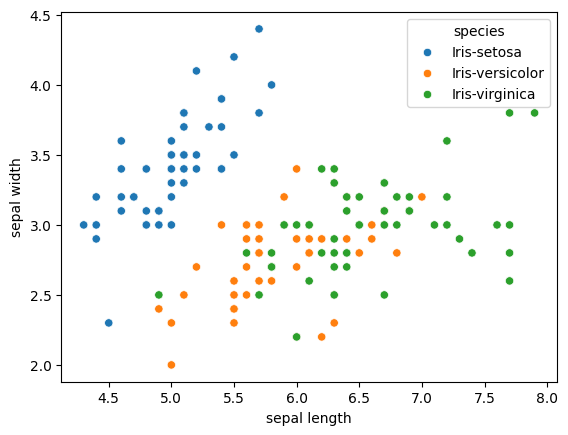

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'sepal length', y = 'sepal width', hue = 'species', data = df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['species'] = le.fit_transform(df['species'])
# df.head()

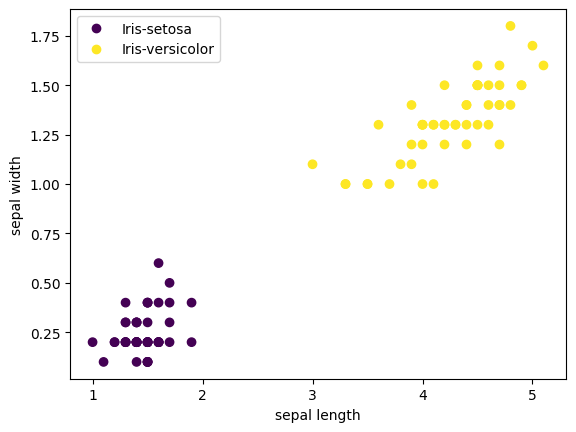

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# df는 X와 y가 결합된 데이터프레임이며, 'Iris-virginica'를 제외
df = pd.concat([X, y], axis=1)
df = df[df['class'] != 'Iris-virginica']

# 클래스 레이블을 숫자로 변환하여 색깔로 표현
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])

# 산점도 그리기
scatter = plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df['class_encoded'], cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

# 범례 추가 (클래스 이름으로)
handles, _ = scatter.legend_elements()
class_labels = le.classes_
plt.legend(handles, class_labels)
plt.show()

In [ ]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

퍼셉트론 모델 훈련

In [ ]:
y['class'] = le.fit_transform(y['class'])
model = Perceptron(eta = 0.1, epochs = 10)
model.fit(X.iloc[:, 2:3].values, y.values)

<ipython-input-70-077e2c972afd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = le.fit_transform(y['class'])
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
model.errors_

[52, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터를 학습용과 테스트용으로 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 2:3].values, y.values, test_size=0.2, random_state=1)

# 모델 훈련
model = Perceptron(eta=0.1, epochs=10)
model.fit(X_train, y_train)


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 43.33%
Confusion Matrix:
[[ 0 11  0]
 [ 0 13  0]
 [ 0  6  0]]


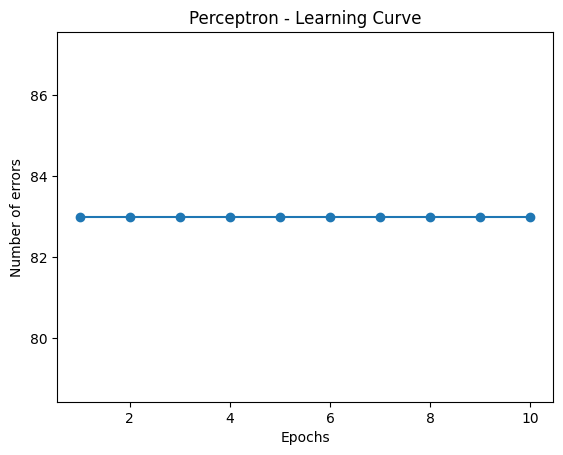

In [ ]:
import matplotlib.pyplot as plt

# 학습 과정에서의 오류 수 시각화
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Learning Curve')
plt.show()


In [ ]:
# 새로운 데이터에 대한 예측 (예: sepal length 3.5인 경우)
new_data = np.array([[3.5]])
prediction = model.predict(new_data)
print(f'Prediction for new data [3.5]: {prediction}')


Prediction for new data [3.5]: [1]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할 (학습용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 2:3].values, y.values, test_size=0.2, random_state=1)

# 하이퍼파라미터 값들의 목록
etas = [0.001, 0.01, 0.1, 1.0]
epochs_list = [10, 50, 100]
best_accuracy = 0
best_params = {}

# 여러 하이퍼파라미터 조합에 대해 모델 학습 및 평가
for eta in etas:
    for epochs in epochs_list:
        model = Perceptron(eta=eta, epochs=epochs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Eta: {eta}, Epochs: {epochs}, Accuracy: {accuracy * 100:.2f}%")

        # 최고 성능을 보이는 하이퍼파라미터 조합을 저장
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'eta': eta, 'epochs': epochs}

# 최적의 하이퍼파라미터 조합 출력
print(f"\nBest Hyperparameters: Eta: {best_params['eta']}, Epochs: {best_params['epochs']}, Accuracy: {best_accuracy * 100:.2f}%")


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.001, Epochs: 10, Accuracy: 43.33%
Eta: 0.001, Epochs: 50, Accuracy: 43.33%
Eta: 0.001, Epochs: 100, Accuracy: 43.33%
Eta: 0.01, Epochs: 10, Accuracy: 43.33%
Eta: 0.01, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.01, Epochs: 100, Accuracy: 43.33%
Eta: 0.1, Epochs: 10, Accuracy: 43.33%
Eta: 0.1, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.1, Epochs: 100, Accuracy: 43.33%
Eta: 1.0, Epochs: 10, Accuracy: 43.33%
Eta: 1.0, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 1.0, Epochs: 100, Accuracy: 43.33%

Best Hyperparameters: Eta: 0.001, Epochs: 10, Accuracy: 43.33%


In [ ]:
# 최적의 하이퍼파라미터로 모델 재학습
final_model = Perceptron(eta=best_params['eta'], epochs=best_params['epochs'])
final_model.fit(X_train, y_train)

# 최종 모델의 테스트 데이터 예측 및 정확도 출력
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
# 최적의 하이퍼파라미터로 모델 재학습
final_model = Perceptron(eta=best_params['eta'], epochs=best_params['epochs'])
final_model.fit(X_train, y_train)

# 최종 모델의 테스트 데이터 예측 및 정확도 출력
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할 (학습용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 2:3].values, y.values, test_size=0.2, random_state=1)

# 하이퍼파라미터 값들의 목록
etas = [0.001, 0.01, 0.1, 1.0]
epochs_list = [10, 50, 100]
best_accuracy = 0
best_params = {}

# 여러 하이퍼파라미터 조합에 대해 모델 학습 및 평가
for eta in etas:
    for epochs in epochs_list:
        model = Perceptron(eta=eta, epochs=epochs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Eta: {eta}, Epochs: {epochs}, Accuracy: {accuracy * 100:.2f}%")

        # 최고 성능을 보이는 하이퍼파라미터 조합을 저장
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'eta': eta, 'epochs': epochs}

# 최적의 하이퍼파라미터 조합 출력
print(f"\nBest Hyperparameters: Eta: {best_params['eta']}, Epochs: {best_params['epochs']}, Accuracy: {best_accuracy * 100:.2f}%")


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.001, Epochs: 10, Accuracy: 43.33%
Eta: 0.001, Epochs: 50, Accuracy: 43.33%
Eta: 0.001, Epochs: 100, Accuracy: 43.33%
Eta: 0.01, Epochs: 10, Accuracy: 43.33%
Eta: 0.01, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.01, Epochs: 100, Accuracy: 43.33%
Eta: 0.1, Epochs: 10, Accuracy: 43.33%
Eta: 0.1, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 0.1, Epochs: 100, Accuracy: 43.33%
Eta: 1.0, Epochs: 10, Accuracy: 43.33%
Eta: 1.0, Epochs: 50, Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


Eta: 1.0, Epochs: 100, Accuracy: 43.33%

Best Hyperparameters: Eta: 0.001, Epochs: 10, Accuracy: 43.33%


In [ ]:
# 최적의 하이퍼파라미터로 모델 재학습
final_model = Perceptron(eta=best_params['eta'], epochs=best_params['epochs'])
final_model.fit(X_train, y_train)

# 최종 모델의 테스트 데이터 예측 및 정확도 출력
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Accuracy: 43.33%


<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


In [ ]:
import joblib

# 모델 저장
joblib.dump(final_model, 'perceptron_model.pkl')

# 저장된 모델 로드
loaded_model = joblib.load('perceptron_model.pkl')

# 로드한 모델로 새로운 데이터 예측
new_data = np.array([[3.5]])
prediction = loaded_model.predict(new_data)
print(f'Prediction for new data [3.5]: {prediction}')


Prediction for new data [3.5]: [1]


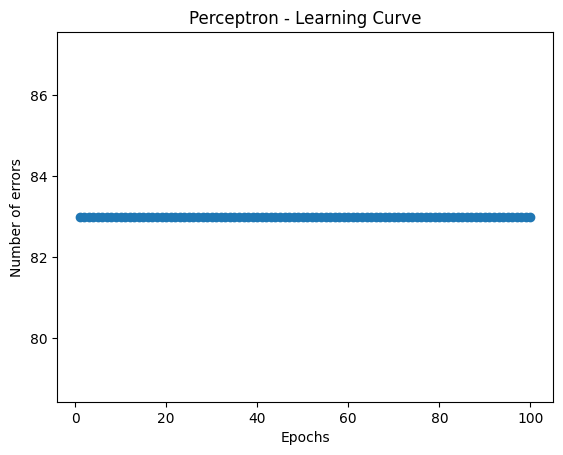

In [ ]:
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron - Learning Curve')
plt.show()

In [ ]:
import pickle

# 예제 데이터
data = {'key': 'value', 'another_key': [1, 2, 3]}

# 객체를 pkl 파일로 저장
with open('example.pkl', 'wb') as f:
    pickle.dump(data, f)

# pkl 파일에서 객체를 불러오기
with open('example.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)


{'key': 'value', 'another_key': [1, 2, 3]}


In [ ]:
import joblib

# 'perceptron_model.pkl' 파일을 joblib을 통해 불러오기
loaded_model = joblib.load('/content/perceptron_model.pkl')

# 불러온 모델로 예측 수행
new_data = np.array([[3.5]])
prediction = loaded_model.predict(new_data)
print(f'Prediction for new data [3.5]: {prediction}')


Prediction for new data [3.5]: [1]


  - 작고 단순한 객체나 특별히 최적화가 필요하지 않은 경우에는 pickle을 사용하는 것이 일반적입니다.
  - 대규모 데이터나 빠른 직렬화/역직렬화가 필요한 경우, 특히 머신러닝 모델을 저장할 때는 joblib이 더 적합합니다.

<ipython-input-67-19fdb32eb1d4>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


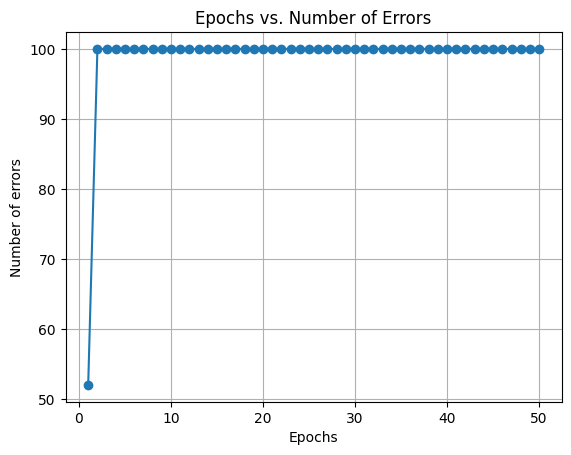

In [ ]:
import matplotlib.pyplot as plt
model = Perceptron(eta = 0.01, epochs = 50)
model.fit(X.iloc[:, 2:3].values, y.values)

# 에포크 수에 따른 오류 수 그래프
epochs = range(1, len(model.errors_) + 1)  # 에포크는 1부터 시작
errors = model.errors_  # 각 에포크에서 발생한 오류 수

# 그래프 그리기
plt.plot(epochs, errors, marker='o')
plt.xlabel('Epochs')  # x축 레이블
plt.ylabel('Number of errors')  # y축 레이블
plt.title('Epochs vs. Number of Errors')  # 그래프 제목
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 표시
